In [1]:
#Importing essential data analysis and visualization libraries while suppressing warnings.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
#About Dataset

In [5]:
#This dataset contains information on video games with sales exceeding 100,000 copies, encompassing key 
#details such as ranking, game name, release platform, release year, genre, publisher, 
#and regional/global sales figures. The dataset offers valuable insights into the video game industry's
#sales dynamics across different regions and can be leveraged for market analysis and decision-making within the gaming sector.


In [6]:
#Reading data from a CSV file into a DataFrame.

In [7]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [9]:
#Rank - Ranking of overall sales ,
#Name - The games name , 
#Platform - Platform of the games release (i.e. PC,PS4, etc.) , 
#Year - Year of the game's release ,
#Genre - Genre of the game ,
#Publisher - Publisher of the game , 
#NA_Sales - Sales in North America (in millions) ,
#EU_Sales - Sales in Europe (in millions) ,
#JP_Sales - Sales in Japan (in millions) ,
#Other_Sales - Sales in the rest of the world (in millions) , 
#Global_Sales - Total worldwide sales.")


In [10]:
# Extracting the column names from the DataFrame 'df'

In [11]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [12]:
# Display DataFrame information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [14]:
#Calculating the percentage of missing values in DataFrame df.

In [15]:
df.isnull().sum()/len(df)*100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [16]:
#MY DATASET HAS 11 COLUMNS AND 16598 ROWS.
#COLUMNS HAS NULL VALUES.


In [17]:
#After analyzing the dataset, it has been identified that certain columns, such as 'year' and 'publisher,' 
#contain null values around 1%. In the subsequent steps, we will proceed to remove these null values.

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()/len(df)*100

Rank            0.0
Name            0.0
Platform        0.0
Year            0.0
Genre           0.0
Publisher       0.0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
Global_Sales    0.0
dtype: float64

In [20]:
# COLUMNS No NULL VALUES.

In [44]:
# 1]ANALYSIS USING BAR CHART

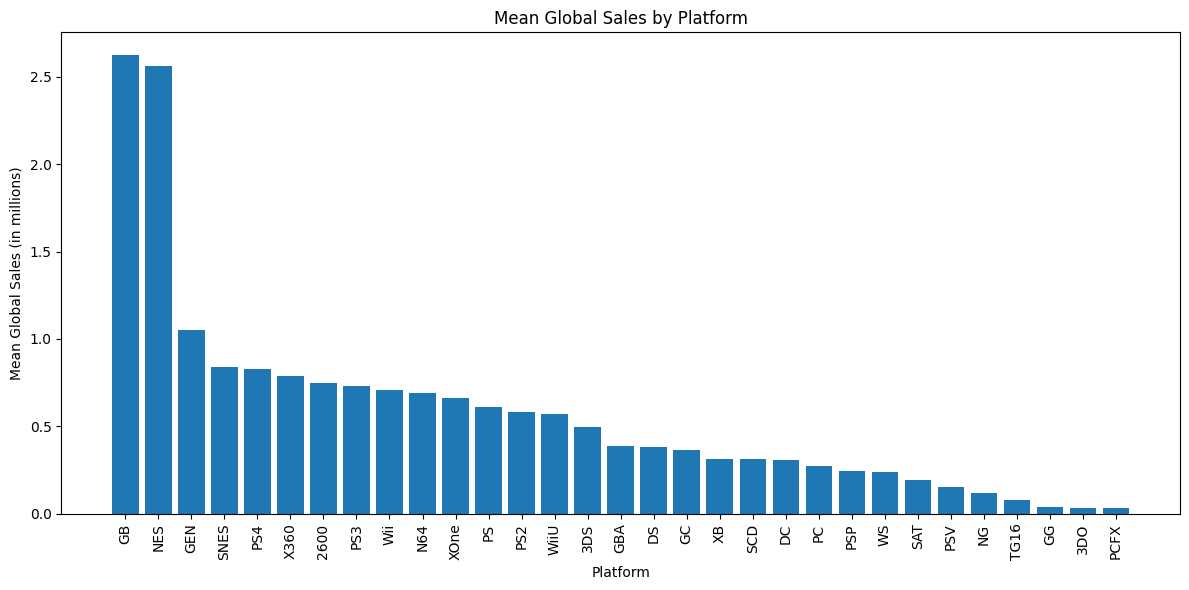

In [45]:
# Group the data by the 'Platform' column and calculate the mean of 'Global_Sales' for each platform
platform_sales = df.groupby('Platform')['Global_Sales'].mean().reset_index()

# Sort the platforms by mean global sales in descending order
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(platform_sales['Platform'], platform_sales['Global_Sales'])
plt.xlabel('Platform')
plt.ylabel('Mean Global Sales (in millions)')
plt.title('Mean Global Sales by Platform')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the chart
plt.tight_layout()
plt.show()


In [46]:
#Analysis
#The resulting bar chart visually conveys that, highlighting GB platform boast the highest and PCFX ,3DO,GG boots lowest average global sales figures.
#This analysis assists in identifying lucrative platforms for game distribution and strategic decision-making within the gaming industry.

In [47]:
#2]Analysis using Funnel Chart

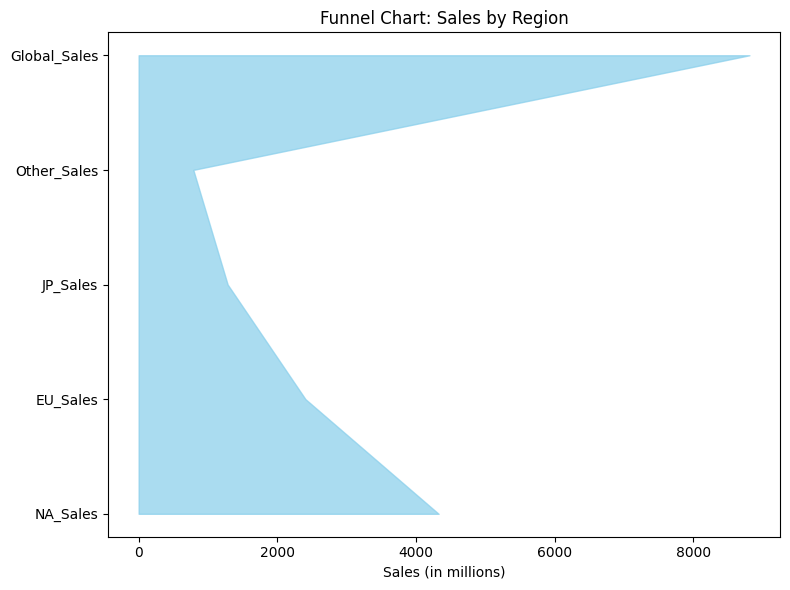

In [48]:

# Calculate the sum of sales for each region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

# Create a list of sales values in descending order
sales_values = region_sales.values[::-1]

# Create a list of region labels in the same order
region_labels = region_sales.index[::-1]

# Create a funnel chart
plt.figure(figsize=(8, 6))
plt.fill_betweenx(range(len(sales_values)), sales_values, color='skyblue', alpha=0.7)
plt.yticks(range(len(sales_values)), region_labels)
plt.xlabel('Sales (in millions)')
plt.title('Funnel Chart: Sales by Region')
plt.gca().invert_yaxis()  # Invert the y-axis to create a funnel effect

# Show the chart
plt.tight_layout()
plt.show()


In [49]:
#The funnel chart illustrates the progressive decrease in video game sales from North America (NA_Sales) to global sales (Global_Sales). 
#It visually highlights that North America contributes the most significant share of global sales, followed by Europe, Japan, and other regions. 
#This analysis aids in understanding the distribution of sales across different geographical markets.

In [50]:
#3]Analysis using heat map

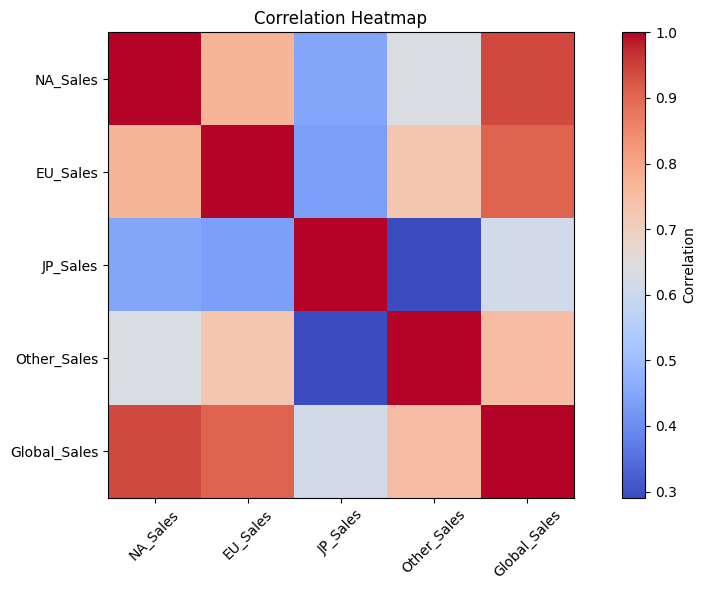

In [51]:

# Select the columns for the heatmap
heatmap_data = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap')

# Display the heatmap
plt.tight_layout()
plt.show()


In [28]:
#The heatmap provides insights into the correlation between video game sales metrics.
#It reveals a strong positive correlation between North American and European sales, indicating 
#that games successful in one region tend to perform well in the other.
#However, these metrics are less correlated with sales in Japan and other regions, suggesting varying market dynamics.

In [52]:
#4]Analysis for histogram

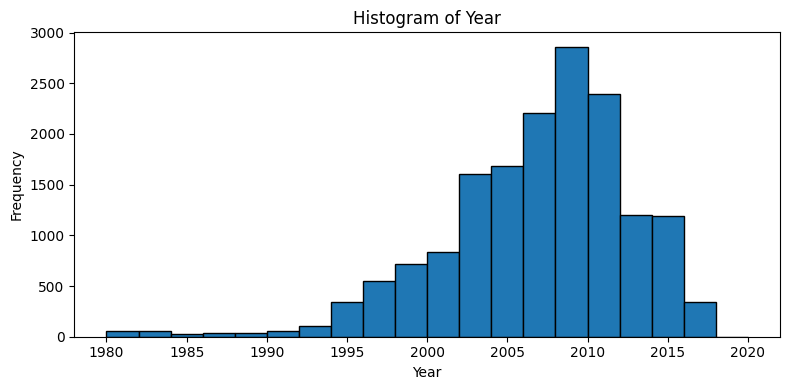

In [53]:

# Create a histogram for the 'Year' column
plt.figure(figsize=(8, 4))
plt.hist(df['Year'], bins=20, edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Year')

# Show the histograms
plt.tight_layout()
plt.show()


In [63]:
#The histogram illustrates the distribution of video game release years within the dataset. 
#It reveals the frequency of game releases over time, helping to identify trends or periods of high and low activity 
#such as 1985 represtnt low and between 2005 to 2010 represent high. 
#The chart's bin count of 20 provides granularity for understanding the distribution of release years.

In [54]:
#5]What are the top 10 best-selling games globally?

In [36]:
# Sort the DataFrame by 'Global_Sales' column in descending order and select the top 10 rows
top_10_global_sales = df.sort_values(by='Global_Sales', ascending=False).head(10)

# Display the top 10 best-selling games
print(top_10_global_sales[['Rank', 'Name', 'Global_Sales']])


   Rank                       Name  Global_Sales
0     1                 Wii Sports         82.74
1     2          Super Mario Bros.         40.24
2     3             Mario Kart Wii         35.82
3     4          Wii Sports Resort         33.00
4     5   Pokemon Red/Pokemon Blue         31.37
5     6                     Tetris         30.26
6     7      New Super Mario Bros.         30.01
7     8                   Wii Play         29.02
8     9  New Super Mario Bros. Wii         28.62
9    10                  Duck Hunt         28.31


In [30]:
#Analysis
#The provided code loads a gaming dataset into a DataFrame,
#sorts it by global sales in descending order, and selects the top 10 best-selling games, 
#displaying their rank, name, and global sales.
#The Answer present a ranked list of video games along with their global sales figures. 
#"Wii Sports" holds the top position with 82.74 million copies sold, followed by iconic titles like "Super Mario Bros." and "Mario Kart Wii."
#The Answer reflects the popularity and commercial success of these games in the gaming industry.

In [55]:
#6]Which platform has the most games released?

In [32]:
# Group the dataset by 'Platform' and count the number of games for each platform
platform_counts = df['Platform'].value_counts()

# Find the platform with the most games released
most_games_platform = platform_counts.idxmax()

# Find the number of games released on that platform
most_games_count = platform_counts.max()

print(f"The platform with the most games released is {most_games_platform} with {most_games_count} games.")


The platform with the most games released is DS with 2131 games.


In [33]:
#Analysis
#The provided Python code leverages pandas to analyze a video game dataset. 
#It groups the data by 'Platform,' counts the number of games released on each platform, and identifies the platform with the most game releases. 
#The result is printed, revealing the platform with the highest game count.
#This answer highlights the DS platform as the leader in the number of released games, totaling 2131 titles. It provides a clear metric 
#for assessing the platform's popularity and game library size, making it a valuable insight for gamers and industry observers.

In [56]:
# 7] What is the average global sales for each genre?

In [35]:

# Group the data by 'Genre' and calculate the average of 'Global_Sales' for each genre
genre_avg_sales = df.groupby('Genre')['Global_Sales'].mean()

# Print the result
print(genre_avg_sales)


Genre
Action          0.529942
Adventure       0.184137
Fighting        0.531160
Misc            0.468488
Platform        0.947577
Puzzle          0.424930
Racing          0.593273
Role-Playing    0.628456
Shooter         0.800468
Simulation      0.459882
Sports          0.568247
Strategy        0.258612
Name: Global_Sales, dtype: float64


In [36]:
#Analysis
#The code uses pandas to analyze a dataset of video game sales.
#It groups the data by game genres and calculates the average global sales for each genre,
#providing insights into which genres tend to perform better in terms of worldwide sales.
#These answer represent a genre-wise analysis of global video game sales, with each genre assigned a numeric value.
#Shooter games have the highest sales potential (0.800468), followed by Role-Playing (0.628456) and Racing (0.593273). 
#Strategy games have the lowest potential (0.258612). 
#These values help identify the popularity and market demand for different game genres.

In [57]:
#8]What is the trend in global sales over the years?

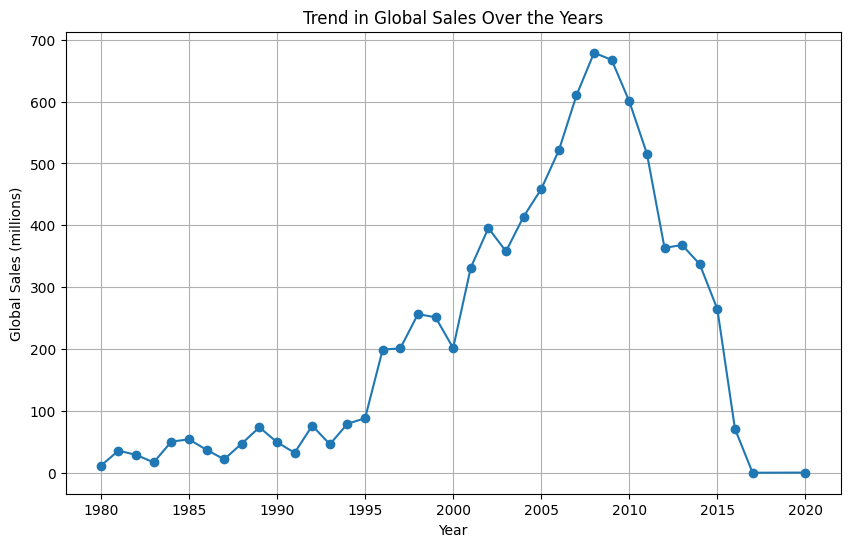

In [41]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-')
plt.title('Trend in Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.show()


In [92]:
#Analysis
#The resulting line plot showcases how global video game sales have evolved over the years, offering a clear snapshot of the industry's performance.

In [58]:
#9]Which publisher has released the most games?

In [47]:
# Group the data by 'Publisher' and count the number of games released by each publisher
publisher_counts = df['Publisher'].value_counts()

# Get the publisher with the highest game releases
most_releases_publisher = publisher_counts.idxmax()
num_releases = publisher_counts.max()

# Print the result
print(f"The publisher with the most game releases is {most_releases_publisher} with {num_releases} games.")


The publisher with the most game releases is Electronic Arts with 1339 games.


In [37]:
#Analysis
#This code segment uses pandas to group the dataset by 'Publisher,' counts the number of games released by each publisher, 
#and identifies the publisher with the highest game releases.
#It then prints this information, indicating the publisher with the most game releases and the corresponding number of games.
#The statement highlights Electronic Arts as the leading publisher in the gaming industry,
#boasting a staggering 1339 game releases. This data underscores Electronic Arts prolific output and dominant position in the market, 
#emphasizing their significant contribution to the gaming landscape.

In [59]:
#10]Are there any strong correlations between variables like rank, year, and global sales?

There is a weak or no significant correlation between Rank and Year.
There is a weak or no significant correlation between Rank and Global_Sales.


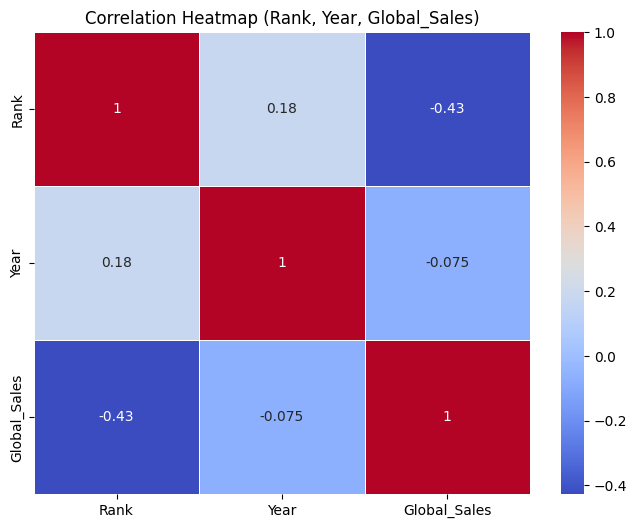

In [94]:
# Calculate the correlation matrix
correlation_matrix = df[['Rank', 'Year', 'Global_Sales']].corr()

# Extract the correlation coefficient between Rank, Year
correlation_coefficient = correlation_matrix.loc['Rank', 'Year']

# Interpret the correlation coefficient
# The correlation coefficient ranges from -1 to 1:
# - Values close to 1 indicate a strong positive correlation.
# - Values close to -1 indicate a strong negative correlation.
# - Values close to 0 indicate a weak or no correlation.
if correlation_coefficient > 0.7:
    print("There is a strong positive correlation between Rank and Year.")
elif correlation_coefficient < -0.7:
    print("There is a strong negative correlation between Rank and Year.")
else:
    print("There is a weak or no significant correlation between Rank and Year.")

# to check the correlation between Rank and Global_Sales
correlation_coefficient = correlation_matrix.loc['Rank', 'Global_Sales']

# Interpret the correlation coefficient
if correlation_coefficient > 0.7:
    print("There is a strong positive correlation between Rank and Global_Sales.")
elif correlation_coefficient < -0.7:
    print("There is a strong negative correlation between Rank and Global_Sales.")
else:
    print("There is a weak or no significant correlation between Rank and Global_Sales.")

# Calculate the correlation matrix
correlation_matrix = df[['Rank', 'Year', 'Global_Sales']].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Rank, Year, Global_Sales)')
plt.show()


In [38]:
#Analysis
#It checks for the strength and direction of correlations.
#If coefficients are >0.7, it indicates a strong positive correlation; if <-0.7, a strong negative correlation; 
#otherwise, a weak or no significant correlation.
#These lines suggest that there is little to no meaningful relationship between a video game's ranking and either the year 
#it was released or its global sales figures. This implies that a game's popularity or success is not strongly influenced by these factors,
#highlighting the need to explore other variables in understanding gaming trends.

In [60]:
#11]to display top 10 outliers in terms of global sales?

In [40]:

# Calculate the z-scores for the 'Global_Sales' column
global_sales_zscore = np.abs((df['Global_Sales'] - df['Global_Sales'].mean()) / df['Global_Sales'].std())

# Set a threshold for outliers (e.g., 3 standard deviations from the mean)
threshold = 3

# Identify outliers based on the threshold
outliers = df[global_sales_zscore > threshold].head(10)

# Display the outliers
print("Outliers in terms of Global Sales:")
print(outliers)


Outliers in terms of Global Sales:
   Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77   

In [41]:
#Analysis
#The code calculates z-scores for the 'Global_Sales' column, 
#measuring how far each data point deviates from the mean in terms of standard deviations. 
#A threshold of 3 standard deviations is set to identify outliers, and the top 10 outliers are displayed with their 'Global Sales' values.
#These lines represent a dataset of top-selling video games, showcasing their rankings, names, platforms, release years, genres, publishers,
#and sales figures across different regions (North America, Europe, Japan, and other regions) as well as their global sales. 
#Notably, these entries are outliers due to their exceptionally high global sales, with the top game, "Wii Sports," having sold 82.74 million copies.
#This data can be used for analyzing trends in the video game industry and identifying factors contributing to their success.

In [61]:
#12]Pie chart

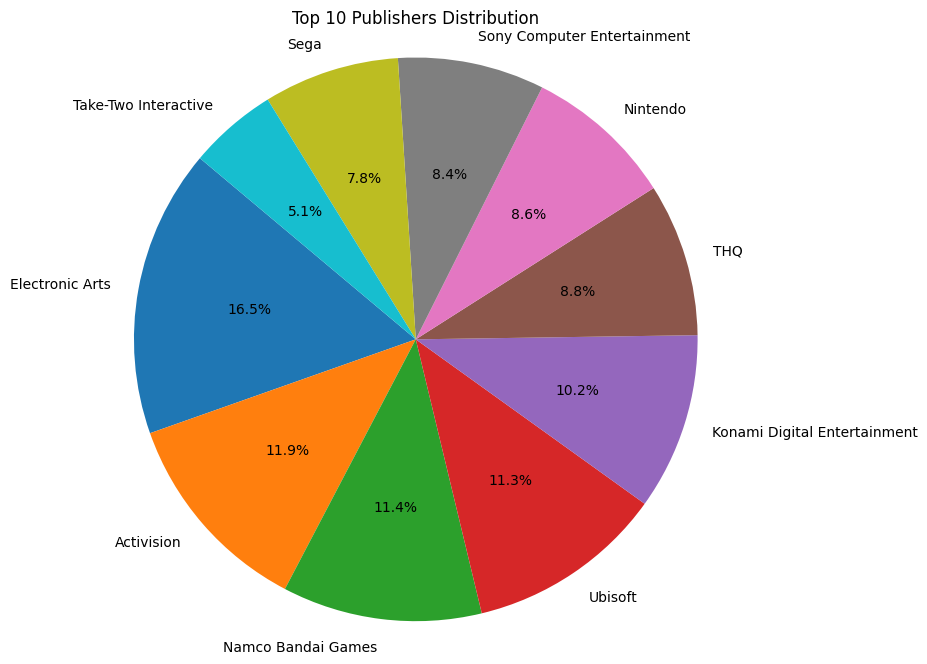

In [43]:

# Count the number of games published by each publisher
publisher_counts = df['Publisher'].value_counts()

# Take the top N publishers for better visualization (adjust N as needed)
N = 10
top_publishers = publisher_counts.head(N)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_publishers, labels=top_publishers.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Publishers Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the chart
plt.show()


In [66]:
#Analysis
#To analyze and visualize the distribution of the top 10 video game publishers. 
#It begins by counting the number of games published by each publisher, selects the top N publishers for clarity, and then creates a pie chart 
#to represent their respective shares. 
#This chart offers insights into the dominance of the top publishers in the gaming industry.

In [1]:
#13]Box plot

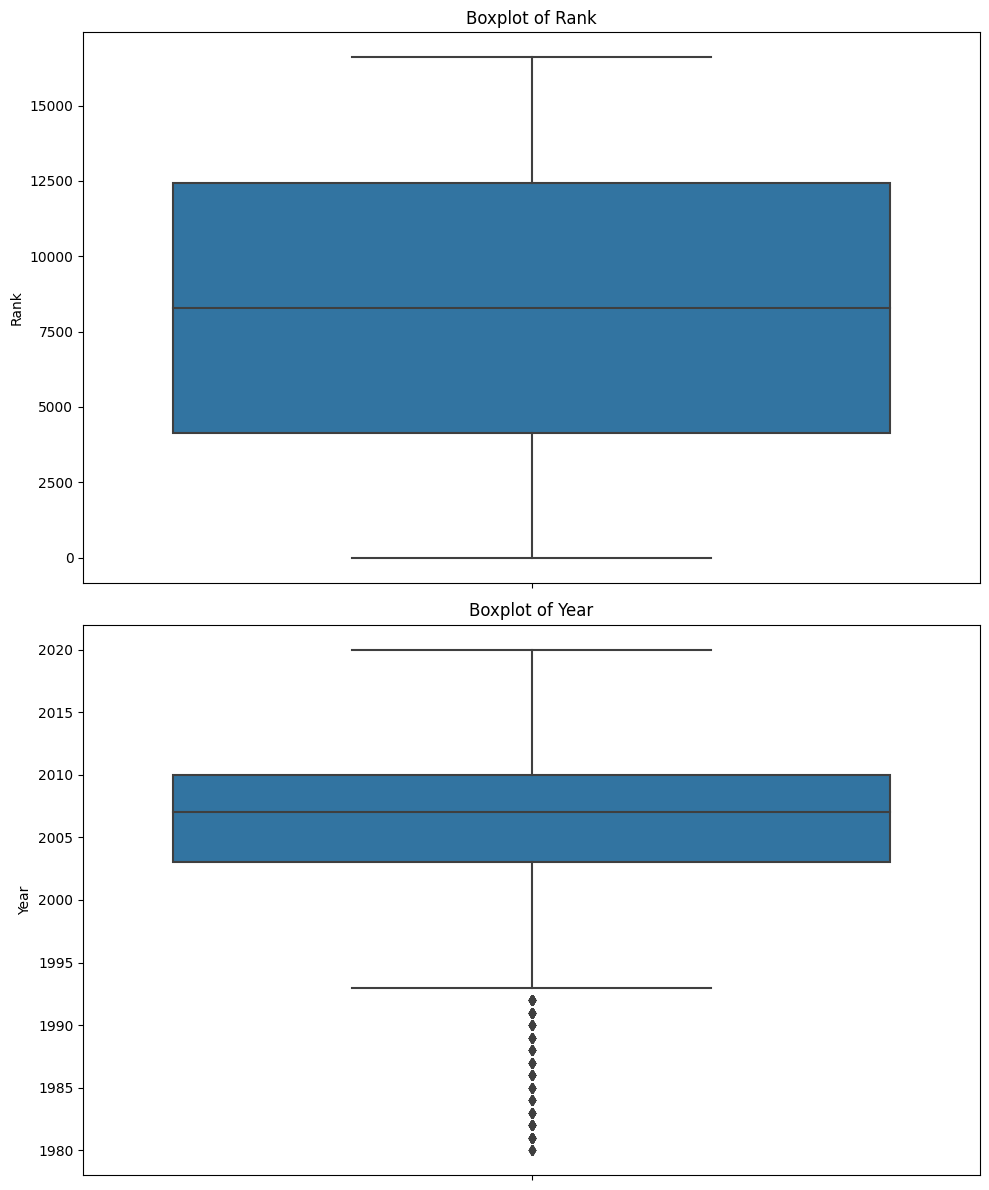

In [72]:
# Create a list of columns you want to create boxplots for
columns_to_plot = ['Rank', 'Year']

# Set up the figure and axis for subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(10, 6 * len(columns_to_plot)))

# Create boxplots for each selected column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()


In [73]:
#The provided code creates side-by-side boxplots for the 'Rank' and 'Year' columns in a dataset. 
#The figure contains two subplots, one for each column, with appropriate titles and labels.
#This visualization allows for a quick comparison of the distribution and potential outliers in these two variables, aiding in data analysis.